In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from collections import defaultdict as dd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
d = dd(lambda: dd(lambda: dd(lambda: dd(lambda: 0))))
d_min = dd(lambda: dd(lambda: dd(lambda: dd(lambda: 0))))
d_max = dd(lambda: dd(lambda: dd(lambda: dd(lambda: 0))))

path = Path('output/')
for filepath in path.iterdir():
    if ('lock' in str(filepath)):
        continue
    df = pd.read_csv(filepath)
    metadata = str(filepath).split('/')[1].split('_')[-3:-1]
    model_name = str(filepath).split('/')[1].split('_')[0]
    for i in df:
        d[model_name][metadata[0]][i][metadata[1]] = np.mean(df[i])
        d_min[model_name][metadata[0]][i][metadata[1]] = np.min(df[i])
        d_max[model_name][metadata[0]][i][metadata[1]] = np.max(df[i])

In [3]:
style = {
    'human': '.-.k',
    'model': '.--k',
    'single_best_policy': 'd-g',
    'mode_policy': 'o-b',
    'weighted_mode_policy': 'x-r',
    'select_all_policy': 'x-g',
    'random': '*-c',
    'lb_best_policy': 'o-r',
    'pseudo_lb_best_policy_overloaded': 'D-b'
}

colors = {
    'g': 'green',
    'b': 'blue',
    'r': 'red',
    'c': 'cyan',
    'k': 'black'
}

In [4]:
maps = [
    dict({'human': 'Only Best Human',
        # 'model': 'Only CNN',
        'single_best_policy': 'Combination: Best Human',
        'mode_policy': 'Combination: Best Majority Human',
        'weighted_mode_policy': 'Combination: Best Weighted-Majority Human'
    }),
    dict({
#         'human': 'Only Best Human',
#           'model': 'Only Resnet',
          'select_all_policy': 'All Humans Selected',
            'random': 'Random Subset Selection',
            'lb_best_policy': 'True LB Subset Selection',
            'pseudo_lb_best_policy_overloaded': 'Pseudo LB Subset Selection'
    })
]

In [5]:
def make_plots(mappings):
    x = None
    for model in d.keys():
        for human_accuracies in d[model].keys():
            flag = False
            for policy in d[model][human_accuracies].keys():
                if policy not in mappings[model]:
                    continue
                flag = True
                ticks = [(k, d[model][human_accuracies][policy][k]) for k in d[model][human_accuracies][policy]]
                ticks_min = [(k, d_min[model][human_accuracies][policy][k]) for k in d_min[model][human_accuracies][policy]]
                ticks_max = [(k, d_max[model][human_accuracies][policy][k]) for k in d_max[model][human_accuracies][policy]]
                ticks.sort()
                ticks_min.sort()
                ticks_max.sort()
                x = np.array(list(map(int, [i[0] for i in ticks])))
                plt.plot(np.log10(x), [100*(1-i[1]) for i in ticks], style[policy], label=mappings[model][policy])
                plt.fill_between(np.log10(x), [100*(1-i[1]) for i in ticks_min], [100*(1-i[1]) for i in ticks_max], facecolor=colors[style[policy][-1]], alpha=0.1)
            if flag:
                plt.xticks(np.log10(x), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
                plt.xlabel('Number of training instances')
                plt.ylabel('Error Rate %')
                plt.grid()
                print(model, human_accuracies)
                plt.savefig(f'plots/{model}_{human_accuracies}.pdf', bbox_inches='tight')
                plt.show()

cnn [0.7, 0.7, 0.7, 0.7, 0.7]


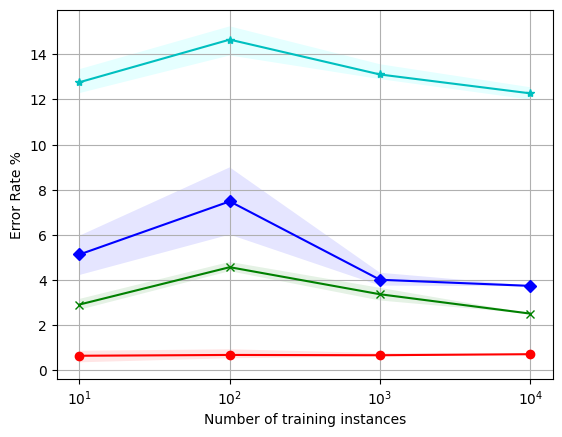

cnn [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


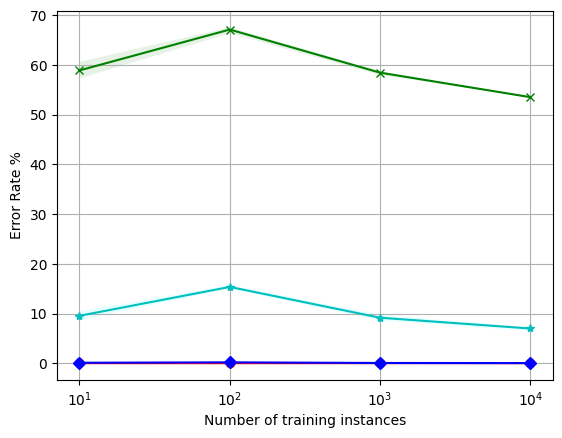

cnn [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


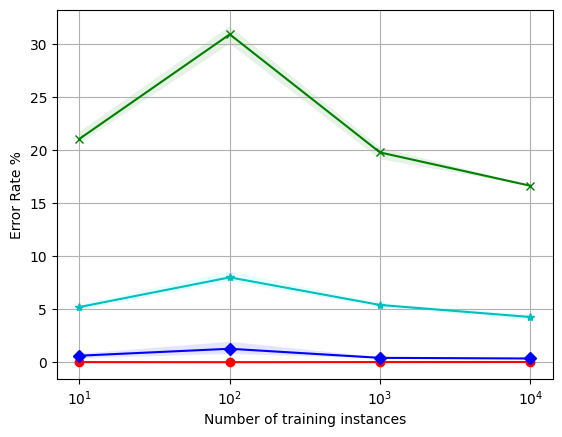

cnn [0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]


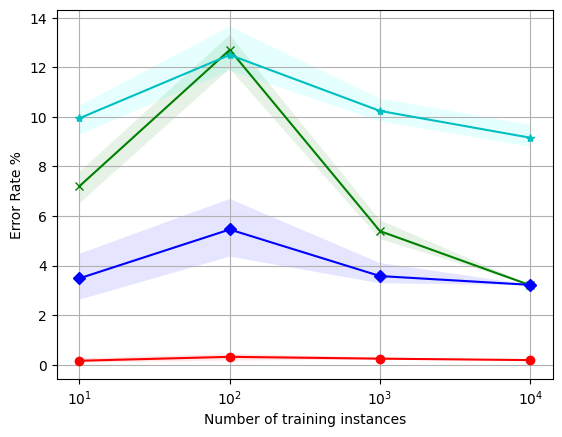

cnn [0.8, 0.75, 0.7, 0.65]


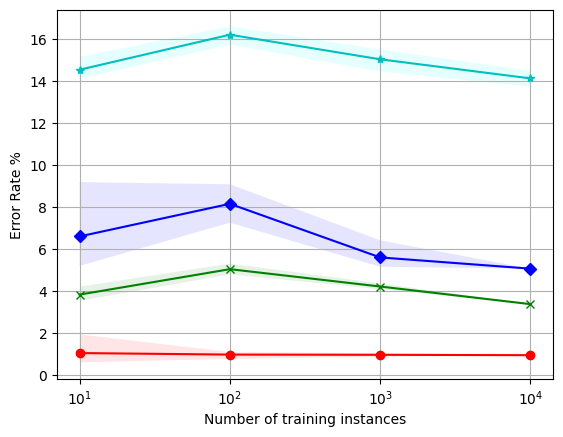

cnn [0.8, 0.77, 0.75, 0.72, 0.7, 0.67, 0.65, 0.63, 0.6, 0.57, 0.55, 0.53, 0.5]


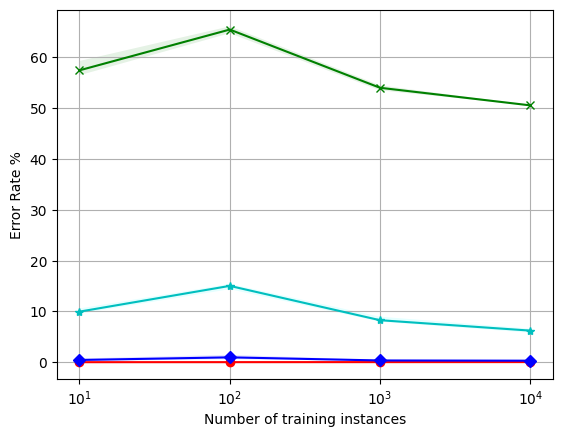

resnet-110 [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


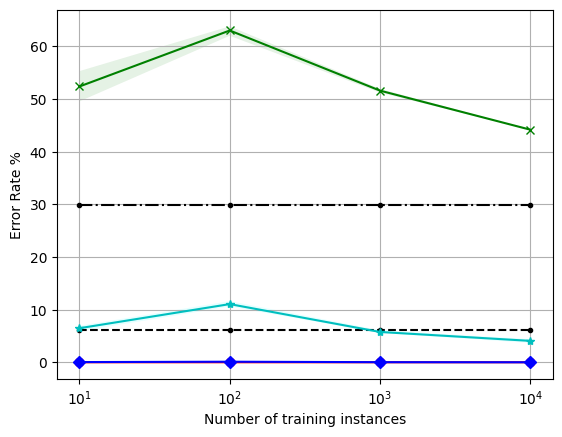

resnet-110 [0.7, 0.7, 0.7, 0.7, 0.7]


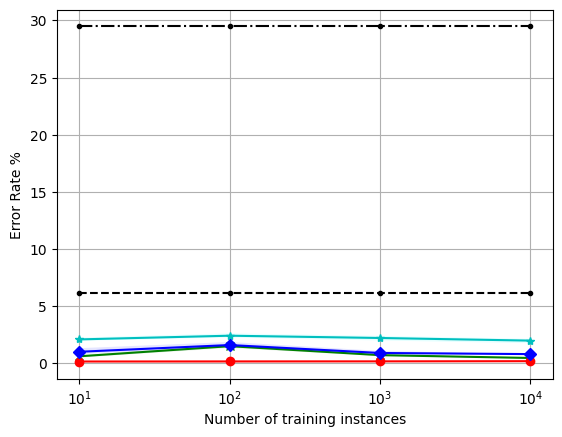

resnet-110 [0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]


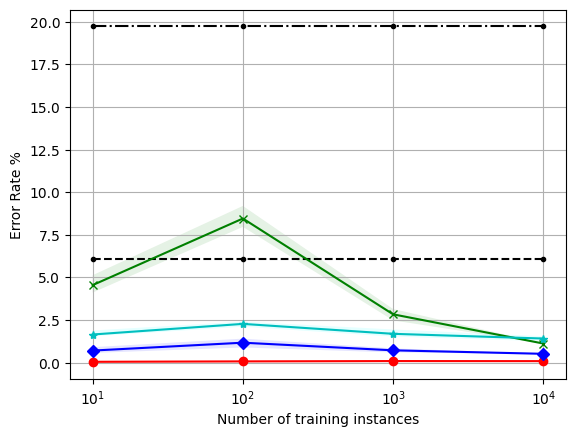

resnet-110 [0.8, 0.75, 0.7, 0.65]


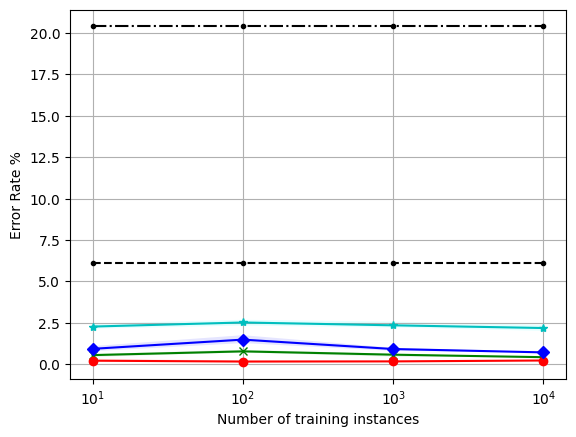

resnet-110 [0.8, 0.77, 0.75, 0.72, 0.7, 0.67, 0.65, 0.63, 0.6, 0.57, 0.55, 0.53, 0.5]


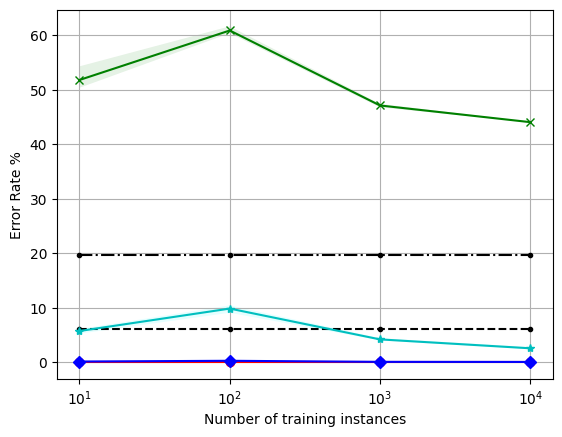

resnet-110 [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


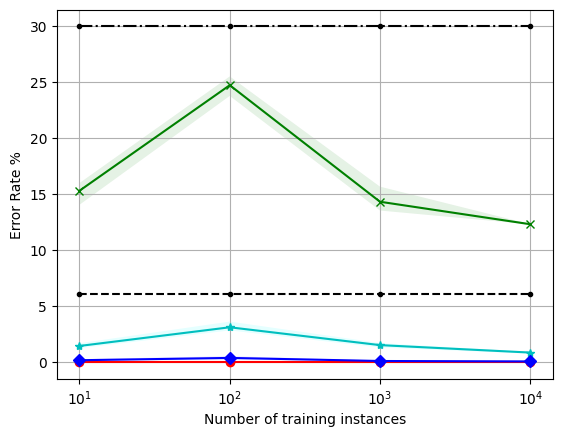

In [6]:
maps = {
    'cnn': dict({
        'select_all_policy': 'All Humans Selected',
        'random': 'Random Subset Selection',
        'lb_best_policy': 'True LB Subset Selection',
        'pseudo_lb_best_policy_overloaded': 'Pseudo LB Subset Selection'
    }),
    'resnet-110': dict({
        'human': 'Only Best Human',
        'model': 'Only Resnet',
        'select_all_policy': 'All Humans Selected',
        'random': 'Random Subset Selection',
        'lb_best_policy': 'True LB Subset Selection',
        'pseudo_lb_best_policy_overloaded': 'Pseudo LB Subset Selection'
    })
}

make_plots(maps)